# CIFAR 10 Image Classifier

## The CIFAR 10 dataset 

* Contain 10 categories of images

1. Airplane
2. Automobile 
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the Dataset

In [8]:
from tensorflow.keras.datasets import cifar10

(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [4]:
print("Initoal Shape of Data :", X_train.shape)
print("X_test Shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)
print("dimension of X_train", X_train[0].shape)

Initoal Shape of Data : (50000, 32, 32, 3)
X_test Shape : (10000, 32, 32, 3)
y_train shape : (50000, 1)
y_test shape : (10000, 1)
dimension of X_train (32, 32, 3)


# Visualize some image

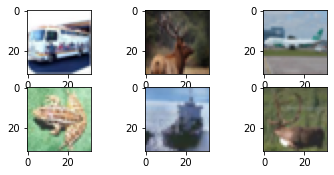

In [5]:
import matplotlib.pyplot as plt

plt.subplot(331)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], plt.get_cmap("gray"))

plt.subplot(332)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], plt.get_cmap("gray"))

plt.subplot(333)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], plt.get_cmap("gray"))

plt.subplot(334)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], plt.get_cmap("gray"))

plt.subplot(335)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], plt.get_cmap("gray"))

plt.subplot(336)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], plt.get_cmap("gray"))

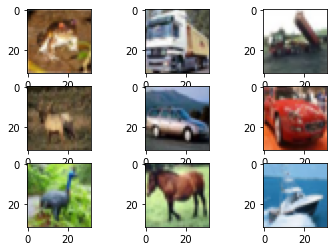

In [5]:
for i in range(0,9):
    plt.subplot(331+ i)
    plt.imshow(X_train[i], cmap = plt.get_cmap("gray"))
    
plt.show()

# Prepare Dataset for training

In [9]:
# Changing the data type

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

#Normalize the data

X_train /= 255
X_test /= 255

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


# Create our model

In [8]:
num_classes = 10
batch_size = 32
epochs = 10

#input shape = (32,32,3)
input_shape = X_train.shape[1:]

In [4]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K

In [11]:
model = Sequential()

model.add(Conv2D(32,(3,3),
                padding = "same",
                input_shape = input_shape))

model.add(Activation("relu"))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),padding = "same"))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

opt = tensorflow.keras.optimizers.RMSprop(lr = 0.0001, decay = 1e-6)

model.compile(loss = "categorical_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

# Training our model

In [12]:
history  = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = 1,
                     validation_data = (X_test,y_test),
                     shuffle = True)

2021-09-15 02:32:23.282303: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2021-09-15 02:32:59.464130: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-15 02:33:00.631844: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2194740000 Hz


   1/1563 [..............................] - ETA: 3:32:27 - loss: 2.3225 - accuracy: 0.0938

2021-09-15 02:33:11.548888: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 27993600 exceeds 10% of free system memory.


   3/1563 [..............................] - ETA: 3:56 - loss: 2.3246 - accuracy: 0.1146 

2021-09-15 02:33:11.753524: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 27993600 exceeds 10% of free system memory.
2021-09-15 02:33:11.887403: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 27993600 exceeds 10% of free system memory.


   5/1563 [..............................] - ETA: 3:36 - loss: 2.3245 - accuracy: 0.1000

2021-09-15 02:33:12.021498: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 27993600 exceeds 10% of free system memory.


1563/1563 [==============================] - 226s 140ms/step - loss: 1.8394 - accuracy: 0.3262 - val_loss: 1.6291 - val_accuracy: 0.4188


In [14]:
history  = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = epochs,
                     validation_data = (X_test,y_test),
                     shuffle = True)

#Save the model

model.save("CIFAR_image_classifier_CNN.h5")

2021-08-22 00:51:11.621845: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2021-08-22 00:52:19.780161: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-22 00:52:20.621548: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2194820000 Hz


Epoch 1/10


2021-08-22 00:52:34.168921: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 21415680 exceeds 10% of free system memory.
2021-08-22 00:52:34.169034: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 21415680 exceeds 10% of free system memory.
2021-08-22 00:52:34.180663: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20995200 exceeds 10% of free system memory.
2021-08-22 00:52:34.180753: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20995200 exceeds 10% of free system memory.


1563/1563 [==============================] - 217s 133ms/step - loss: 1.8389 - accuracy: 0.3258 - val_loss: 1.6079 - val_accuracy: 0.4292
Epoch 2/10
1563/1563 [==============================] - 204s 131ms/step - loss: 1.4945 - accuracy: 0.4566 - val_loss: 1.3461 - val_accuracy: 0.5129
Epoch 3/10
1563/1563 [==============================] - 208s 133ms/step - loss: 1.3515 - accuracy: 0.5141 - val_loss: 1.2795 - val_accuracy: 0.5479
Epoch 4/10
1563/1563 [==============================] - 200s 128ms/step - loss: 1.2513 - accuracy: 0.5555 - val_loss: 1.1476 - val_accuracy: 0.5977
Epoch 5/10
1563/1563 [==============================] - 216s 138ms/step - loss: 1.1748 - accuracy: 0.5827 - val_loss: 1.1350 - val_accuracy: 0.5989
Epoch 6/10
1563/1563 [==============================] - 206s 132ms/step - loss: 1.1117 - accuracy: 0.6067 - val_loss: 1.0606 - val_accuracy: 0.6216
Epoch 7/10
1563/1563 [==============================] - 189s 121ms/step - loss: 1.0635 - accuracy: 0.6275 - val_loss: 1.025

In [15]:
# Evaluating the model

score = model.evaluate(X_test, y_test,verbose = 1)

print("Test Loss", score[0])
print("Test accuracy", score[1])

313/313 [==============================] - 7s 22ms/step - loss: 0.9034 - accuracy: 0.6832
Test Loss 0.9033620953559875
Test accuracy 0.6832000017166138


# Plotting the accuracy and loss

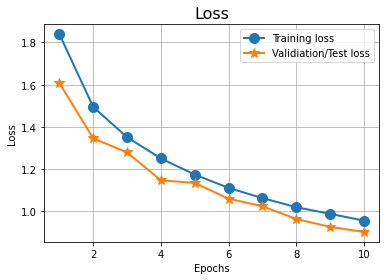

In [18]:
# plotting the loss chart

import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, loss_values, label = "Training loss")
line2 = plt.plot(epochs, val_loss_values, label = "Validiation/Test loss")

plt.setp(line1, linewidth = 2.0, marker = "o", markersize = 10)
plt.setp(line2, linewidth = 2.0, marker = "*", markersize = 10)
plt.title("Loss",fontsize = 16)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

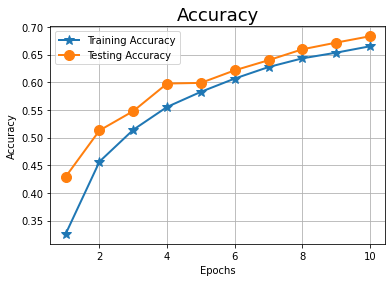

In [20]:
#plotting Accuracy

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

epochs = range(1,len(acc_values)+1)

line1 = plt.plot(epochs, acc_values, label = "Training Accuracy")
line2 = plt.plot(epochs, val_acc_values, label = "Testing Accuracy")

plt.setp(line1, linewidth = 2, marker = "*", markersize = 10)
plt.setp(line2, linewidth = 2, marker = "o", markersize = 10)
plt.title("Accuracy",fontsize = 18)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# Testing the Classifier

In [ ]:
from tensorflow.keras.models import load_model

iw, ih, ic = 32,32,3

classifier = load_model("CIFAR_image_classifier_CNN.h5")
color = True
scale = 8

def draw_test(name,res,input_im,color,scale,iw, ih):
    BLACK = [0,0,0]
    expanded_img = cv2.copyMakeBorder(input_im ,0,0,0,imageL.shape[0]*2, cv2.BORDER_CONSTANT, value = BLACK)
    if color = False:
        expanded_img = cv2.cvtColor(expanded_img, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_img, str(pred),(120,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,222,0),4)
    cv2.imshow(name, expanded_img)
    

for i in range(0,10):
    num = np.random.randint(0,len(X_test))
    input_im = X_test[num]
    
    imageL = cv2.resize(input_im , None,fx = scale, fy = scale, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,iw,ih,ic)
    
    #prediction 
    
    res = str(classifier.predict_classes(input_im, 1,verbose = 0)[0])
    
    draw_test("prediction",res,imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

# ALexNet CNN

In [2]:
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.regularizers import l2

In [7]:
l2_reg = 0

#initialize model

model = Sequential()

#1st Conv Layer

model.add(Conv2D(96,(11,11),input_shape = (32,32,3),
                 padding = "same", kernel_regularizer=(l2(l2_reg))))

model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#2nd Conv Layer

model.add(Conv2D(256,(5,5),padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#3rd Conv Layer

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256,(3,3),padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#4th Conv Layer

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024,(3,3),padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#5th Conv Layer

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024,(3,3),padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#1st Fully connected layer

model.add(Flatten())
model.add(Dense(3072))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))

#2nd Fully Layer

model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))

#3rd Fully layer

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = tensorflow.keras.optimizers.Adadelta(),
              metrics = ["accuracy"])

print(model.summary())
          

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 96)        34944     
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 256)       1024      
_________________________________________________________________
activation_9 (Activation)    (None, 16, 16, 256)      

# Train AlexNet CNN

In [11]:
batch_size = 64
epochs = 1

history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_test, y_test),
                    shuffle = True)

model.save("AlexNet_CNN_CIFAR10.h5")

2021-09-19 02:12:31.159515: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-19 02:12:33.419267: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2194740000 Hz


782/782 [==============================] - 5626s 7s/step - loss: 2.1933 - accuracy: 0.2209 - val_loss: 1.8326 - val_accuracy: 0.3537
